# 🔌 Exploratory Data Analysis of Household Electricity Consumption

This notebook explores household energy usage patterns using the UCI Smart Meter dataset.  
The goal is to clean, process, and visualize electricity consumption data to identify trends and behavioral patterns relevant to the energy sector.



## 📄 Dataset Description

**Source:** UCI Machine Learning Repository  
**Time Range:** December 2006 – November 2010  
**Granularity:** One-minute intervals  
**Attributes:**
- `Global_active_power`: Household active power (kW)
- `Sub_metering_1/2/3`: Energy per appliance group
- `Voltage`, `Current`, etc.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 5)

# Load the data (DO NOT parse dates here to avoid warnings)
df_raw = pd.read_csv(
    '/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt',
    sep=';',
    na_values='?',
    low_memory=False
)

# ✅ Combine Date and Time manually, and set correct format with dayfirst=True
df_raw['Datetime'] = pd.to_datetime(
    df_raw['Date'] + ' ' + df_raw['Time'],
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce'
)

# Drop rows with parsing errors (if any)
df_raw.dropna(subset=['Datetime'], inplace=True)

# Set datetime as index and drop original Date, Time columns
df = df_raw.drop(columns=['Date', 'Time'])
df.set_index('Datetime', inplace=True)

# Convert all other columns to numeric safely
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data (optional)
df.dropna(inplace=True)

# Preview cleaned dataset
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## 📈 Daily Electricity Consumption

Each row in the dataset represents electricity usage in kilowatts (kW) for a 1-minute interval. To convert this to energy consumed:

\[
\text{Energy (kWh)} = \text{Power (kW)} \times \frac{1}{60}
\]

We calculate energy for each minute and then add it up daily to understand how much energy was consumed each day.

The line plot below shows how the energy consumption changes day by day. Spikes can indicate higher appliance usage or specific events.


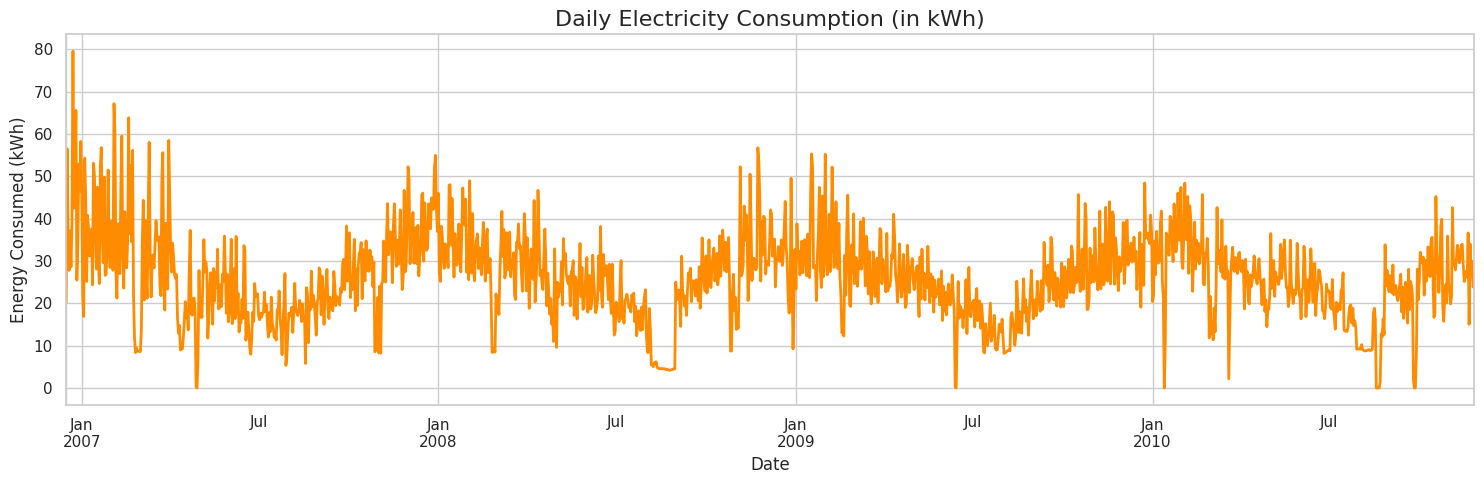

In [61]:
# Step 1: Convert power (kW) to energy (kWh) for each row (1-minute interval)
df['Energy_kWh'] = df['Global_active_power'] * (1/60)

# Step 2: Group by day and sum the energy
daily_energy = df['Energy_kWh'].resample('D').sum()

# Step 3: Plot the daily energy consumption
plt.figure(figsize=(15, 5))
daily_energy.plot(color='darkorange', linewidth=2)
plt.title('Daily Electricity Consumption (in kWh)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Energy Consumed (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 4.1 Statistical Overview

Let's begin the Exploratory Data Analysis by examining basic descriptive statistics of the dataset. This will help us understand the distribution, central tendency, and variability of each numeric column.


In [62]:
# Display descriptive statistics of numerical features
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_kWh
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,1.819358e-02
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,1.762157e-02
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.266667e-03
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.133333e-03
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.003333e-02
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2.546667e-02
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.853667e-01


### 4.2 Distribution of Global Active Power

We visualize the distribution of `Global_active_power` to understand how energy is typically consumed across the dataset. We'll use a histogram with a KDE (Kernel Density Estimate) to capture both frequency and trend.


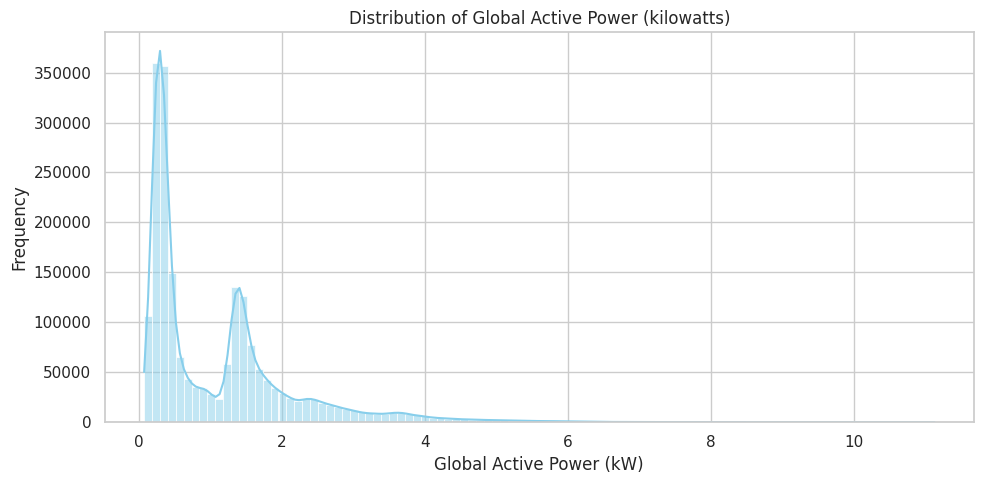

In [63]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Global_active_power'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Global Active Power (kilowatts)')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


### 4.4 Global Active Power Over Time

Plotting Global Active Power against time allows us to detect long-term patterns, seasonality, or sudden spikes which might indicate special events or faults in the system.


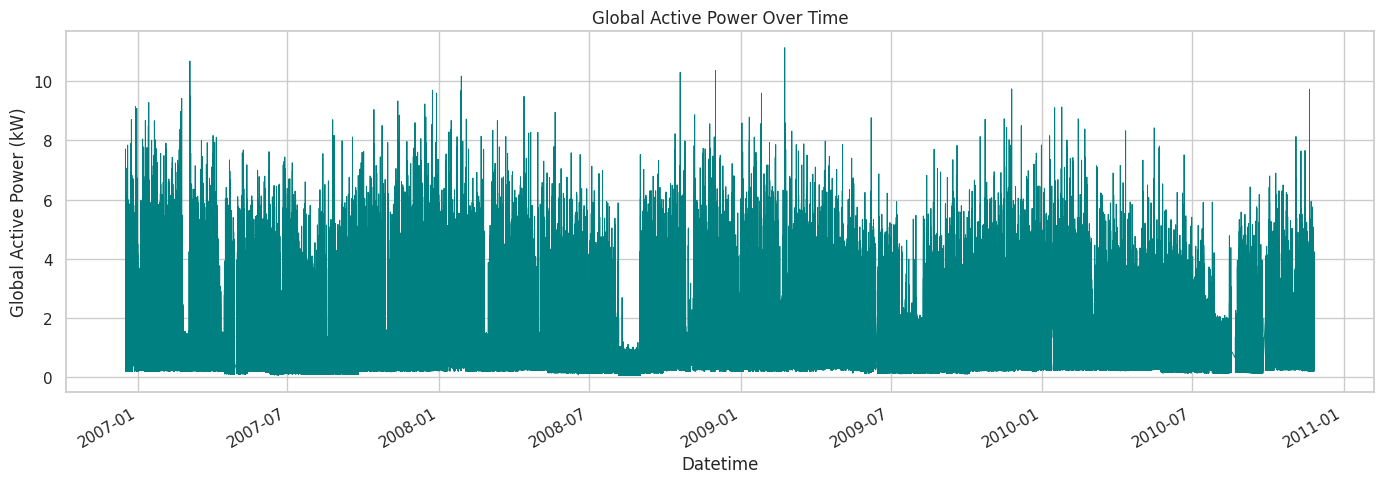

In [65]:
plt.figure(figsize=(14,5))
df['Global_active_power'].plot(linewidth=0.7, color='teal')
plt.title('Global Active Power Over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Sub-Metered Energy Usage (Original Values)

The following subplots show unnormalized household energy consumption over time:

- **Top:** Kitchen (Sub_metering_1)
- **Middle:** Laundry Room (Sub_metering_2)
- **Bottom:** Water Heater & Air Conditioning (Sub_metering_3)

Each subplot uses the actual watt-hour readings and shares the same time axis for easy comparison.


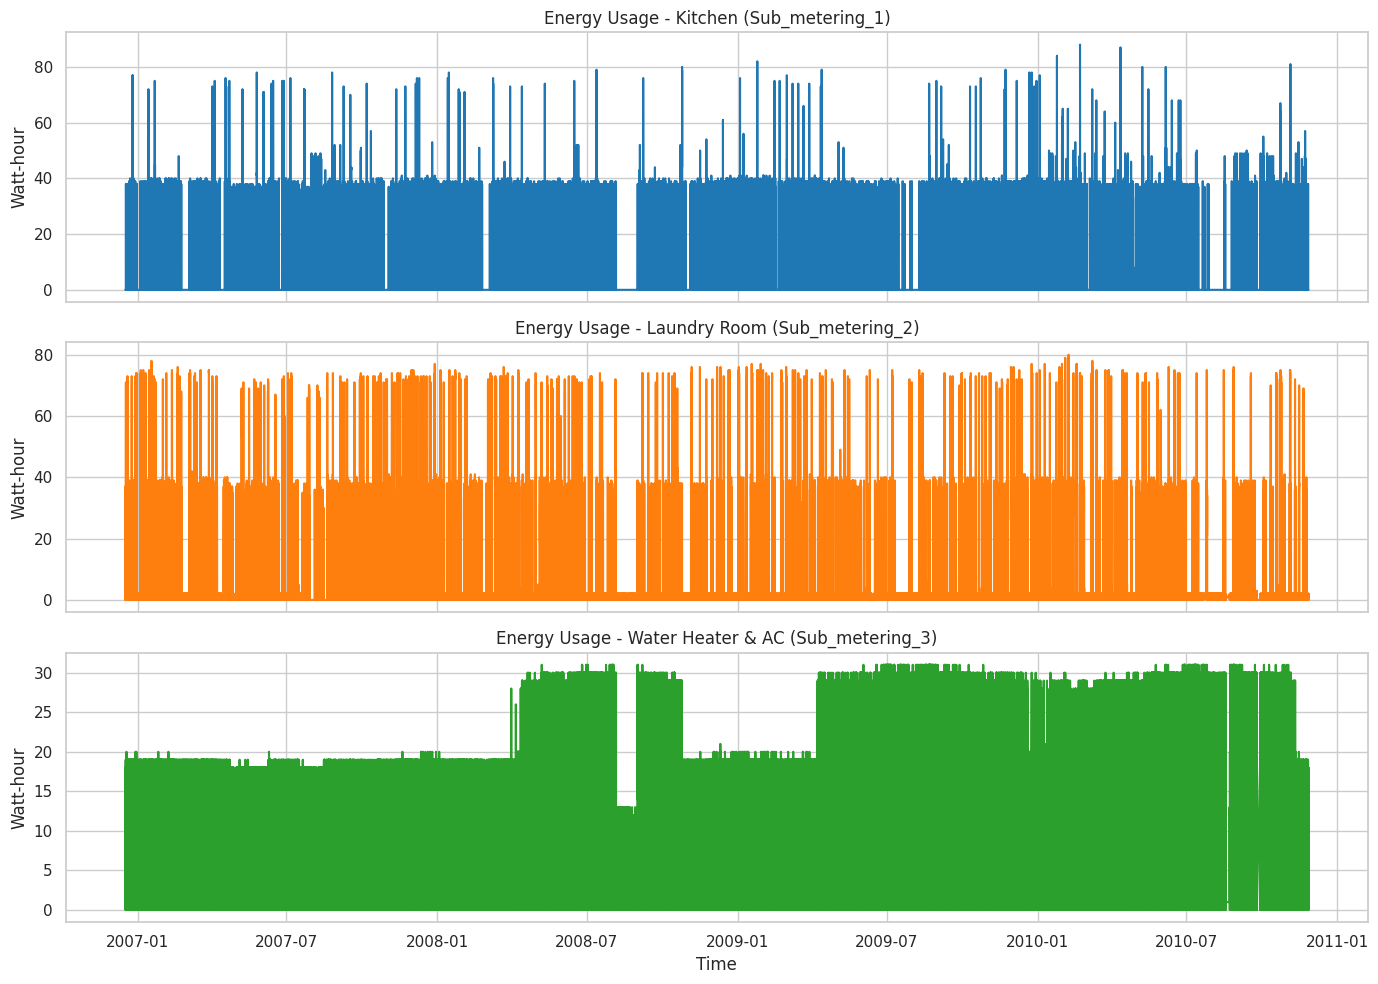

In [67]:
import matplotlib.pyplot as plt

# Plotting raw sub-metering values in separate subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

axs[0].plot(df.index, df['Sub_metering_1'], color='tab:blue')
axs[0].set_title('Energy Usage - Kitchen (Sub_metering_1)')
axs[0].set_ylabel('Watt-hour')
axs[0].grid(True)

axs[1].plot(df.index, df['Sub_metering_2'], color='tab:orange')
axs[1].set_title('Energy Usage - Laundry Room (Sub_metering_2)')
axs[1].set_ylabel('Watt-hour')
axs[1].grid(True)

axs[2].plot(df.index, df['Sub_metering_3'], color='tab:green')
axs[2].set_title('Energy Usage - Water Heater & AC (Sub_metering_3)')
axs[2].set_ylabel('Watt-hour')
axs[2].set_xlabel('Time')
axs[2].grid(True)

plt.tight_layout()
plt.show()


### 5.2 Daily Energy Consumption per Sub-Meter

Daily totals were computed for each sub-meter by resampling the data at a daily frequency. The resulting energy usage trends are visualized below:

- **Top Panel:** Kitchen usage
- **Middle Panel:** Laundry room usage
- **Bottom Panel:** Water heater & air conditioning usage

Using separate panels allows for more granular insight into the daily variations in energy consumption for each sub-area.


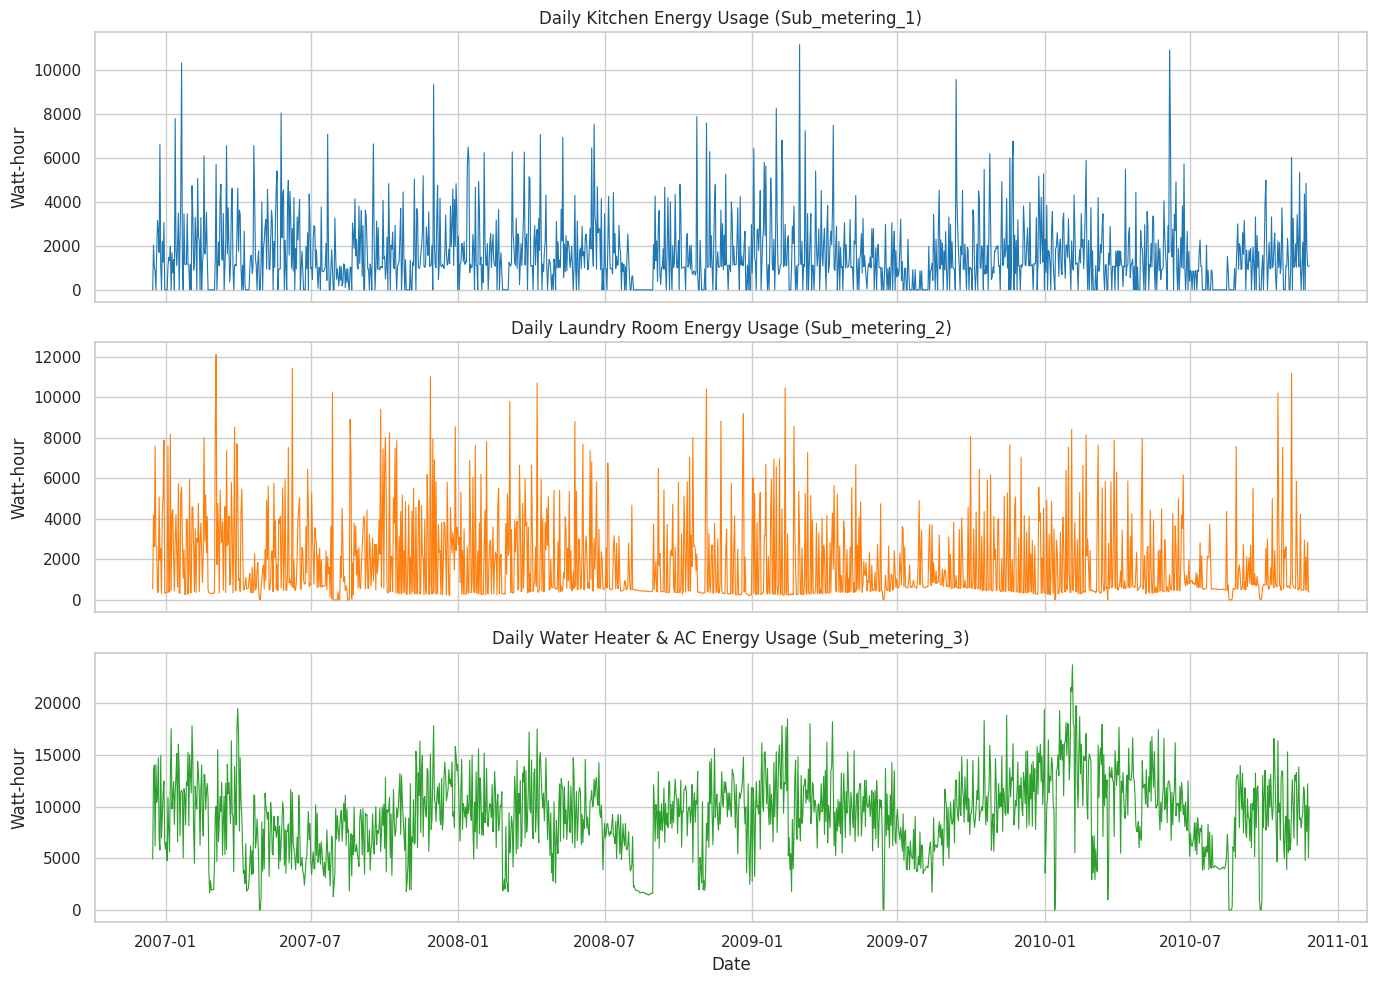

In [69]:
# Resample to daily energy usage
daily_usage = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('D').sum()

# Plot daily usage for each sub-meter separately
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

axes[0].plot(daily_usage.index, daily_usage['Sub_metering_1'], color='tab:blue', linewidth=0.8)
axes[0].set_title('Daily Kitchen Energy Usage (Sub_metering_1)')
axes[0].set_ylabel('Watt-hour')
axes[0].grid(True)

axes[1].plot(daily_usage.index, daily_usage['Sub_metering_2'], color='tab:orange', linewidth=0.8)
axes[1].set_title('Daily Laundry Room Energy Usage (Sub_metering_2)')
axes[1].set_ylabel('Watt-hour')
axes[1].grid(True)

axes[2].plot(daily_usage.index, daily_usage['Sub_metering_3'], color='tab:green', linewidth=0.8)
axes[2].set_title('Daily Water Heater & AC Energy Usage (Sub_metering_3)')
axes[2].set_ylabel('Watt-hour')
axes[2].set_xlabel('Date')
axes[2].grid(True)

plt.tight_layout()
plt.show()


### 5.3 Weekly Energy Consumption per Sub-Meter

To smooth out daily fluctuations and observe broader consumption trends, we computed the **weekly total energy usage** for each sub-meter.

- **Kitchen (Sub_metering_1)** shows moderate week-to-week variation.
- **Laundry Room (Sub_metering_2)** exhibits more consistent patterns.
- **Water Heater & AC (Sub_metering_3)** may reveal seasonal usage trends more clearly.

This weekly aggregation helps identify periodic spikes or drops that may relate to occupant behavior or environmental conditions.


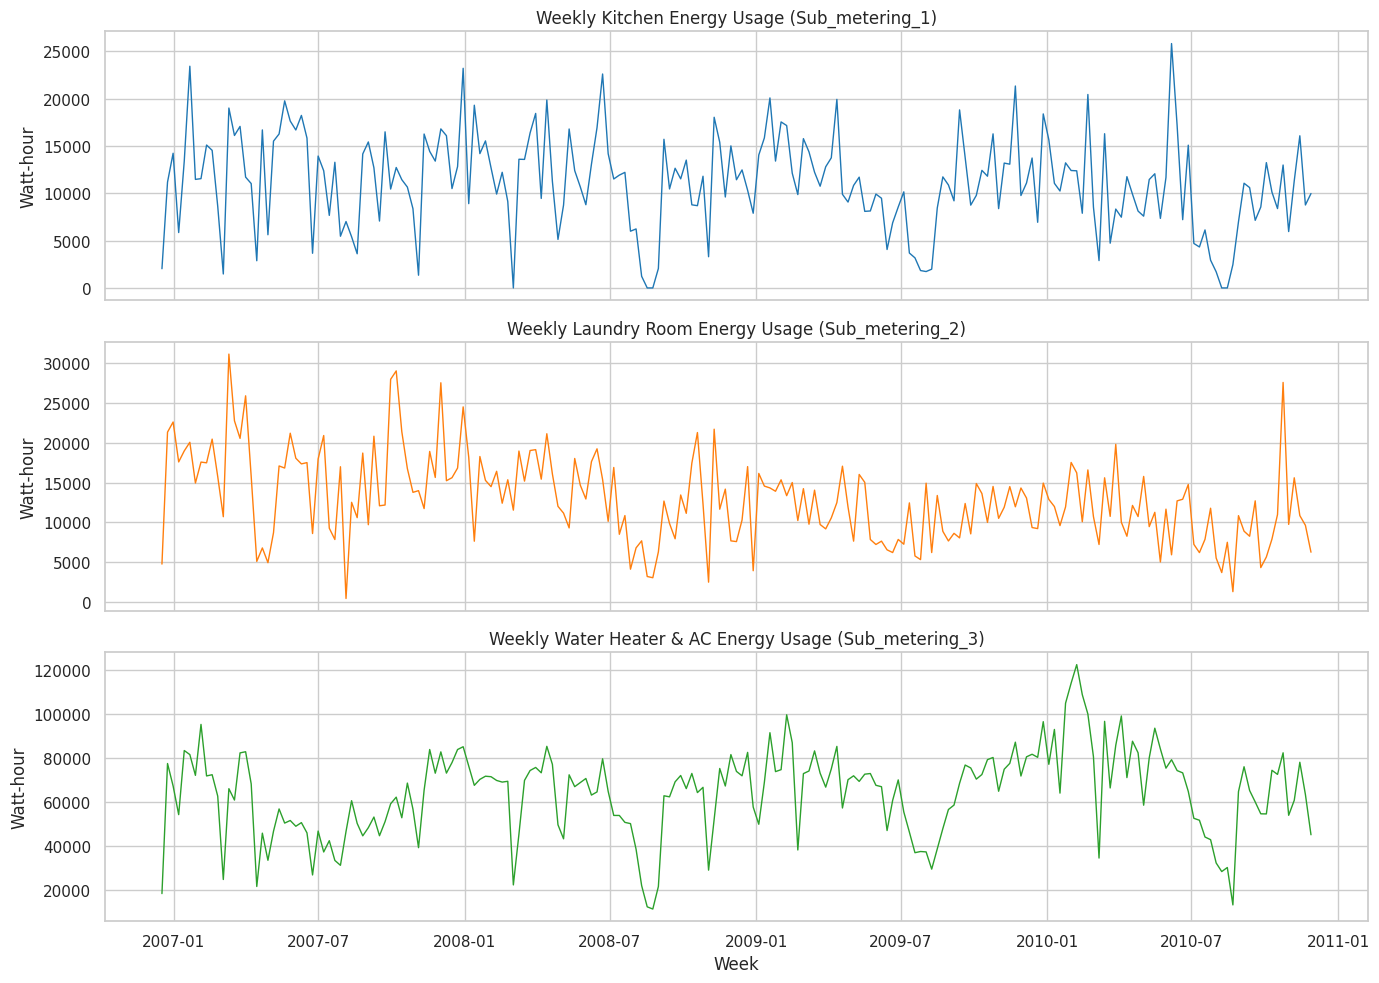

In [70]:
# Resample to weekly energy usage
weekly_usage = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('W').sum()

# Plot weekly usage for each sub-meter separately
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

axes[0].plot(weekly_usage.index, weekly_usage['Sub_metering_1'], color='tab:blue', linewidth=1)
axes[0].set_title('Weekly Kitchen Energy Usage (Sub_metering_1)')
axes[0].set_ylabel('Watt-hour')
axes[0].grid(True)

axes[1].plot(weekly_usage.index, weekly_usage['Sub_metering_2'], color='tab:orange', linewidth=1)
axes[1].set_title('Weekly Laundry Room Energy Usage (Sub_metering_2)')
axes[1].set_ylabel('Watt-hour')
axes[1].grid(True)

axes[2].plot(weekly_usage.index, weekly_usage['Sub_metering_3'], color='tab:green', linewidth=1)
axes[2].set_title('Weekly Water Heater & AC Energy Usage (Sub_metering_3)')
axes[2].set_ylabel('Watt-hour')
axes[2].set_xlabel('Week')
axes[2].grid(True)

plt.tight_layout()
plt.show()

### 5.4 Monthly Energy Consumption per Sub-Meter

Monthly aggregation helps us analyze **long-term trends** in energy usage:

- The **Kitchen (Sub_metering_1)** shows moderate variation, possibly linked to changes in cooking habits.
- The **Laundry Room (Sub_metering_2)** appears more stable with occasional spikes, potentially related to seasonal laundry loads.
- The **Water Heater & AC (Sub_metering_3)** reveals strong **seasonal trends**, likely influenced by heating and cooling requirements.

This view is ideal for energy budgeting and detecting seasonal behavior.


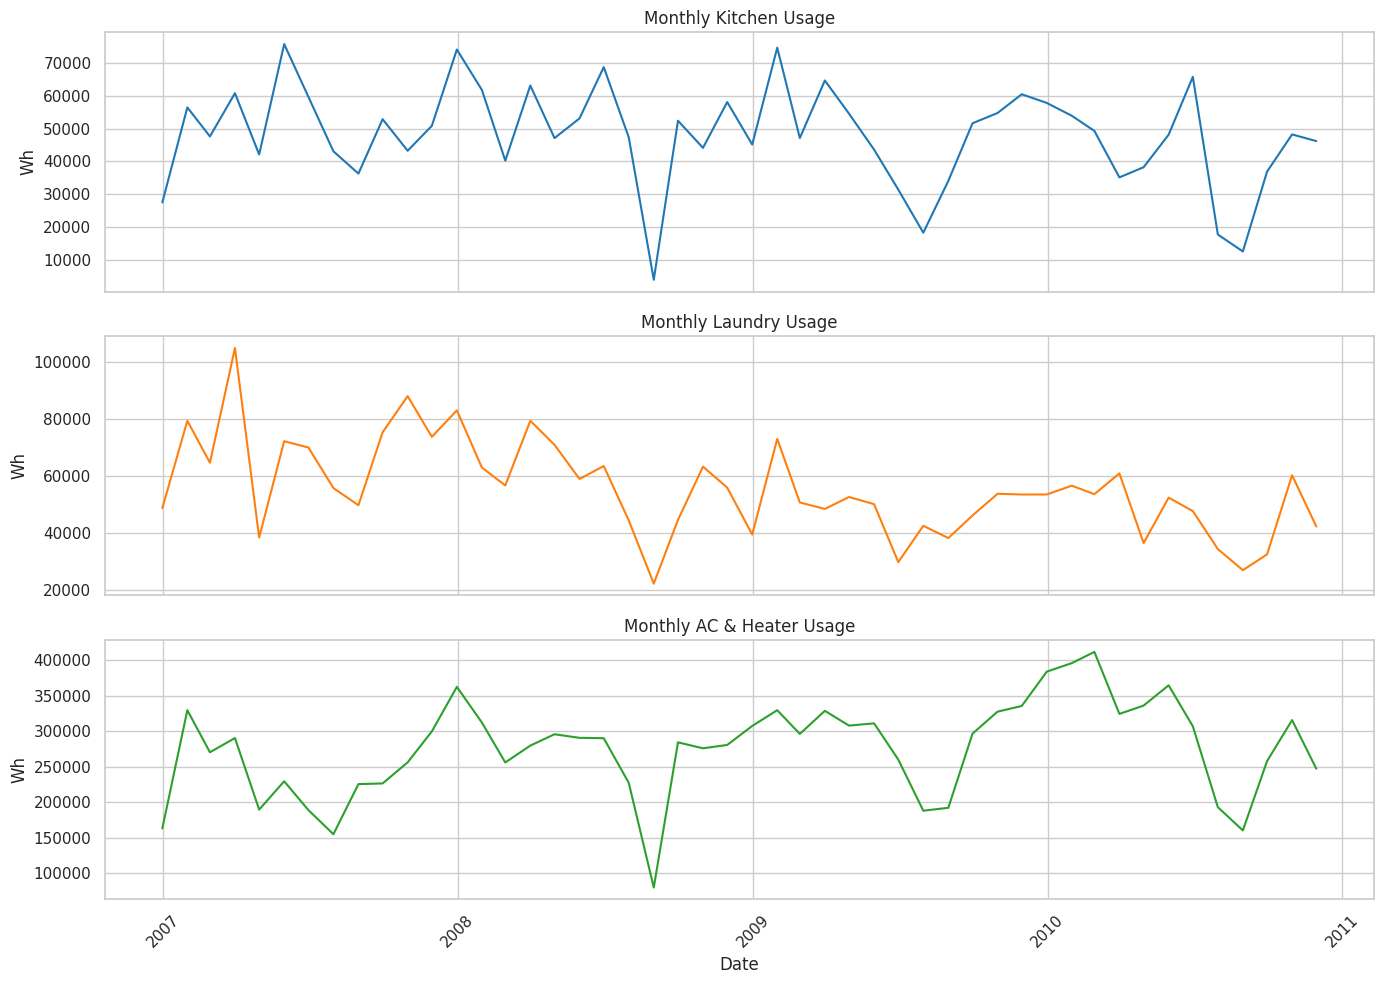

In [71]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

monthly_usage = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('ME').sum()

fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

axes[0].plot(monthly_usage.index, monthly_usage['Sub_metering_1'], color='tab:blue')
axes[0].set_title('Monthly Kitchen Usage')
axes[0].set_ylabel('Wh')
axes[0].grid(True)

axes[1].plot(monthly_usage.index, monthly_usage['Sub_metering_2'], color='tab:orange')
axes[1].set_title('Monthly Laundry Usage')
axes[1].set_ylabel('Wh')
axes[1].grid(True)

axes[2].plot(monthly_usage.index, monthly_usage['Sub_metering_3'], color='tab:green')
axes[2].set_title('Monthly AC & Heater Usage')
axes[2].set_ylabel('Wh')
axes[2].set_xlabel('Date')
axes[2].grid(True)

# Fix x-axis formatting
for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


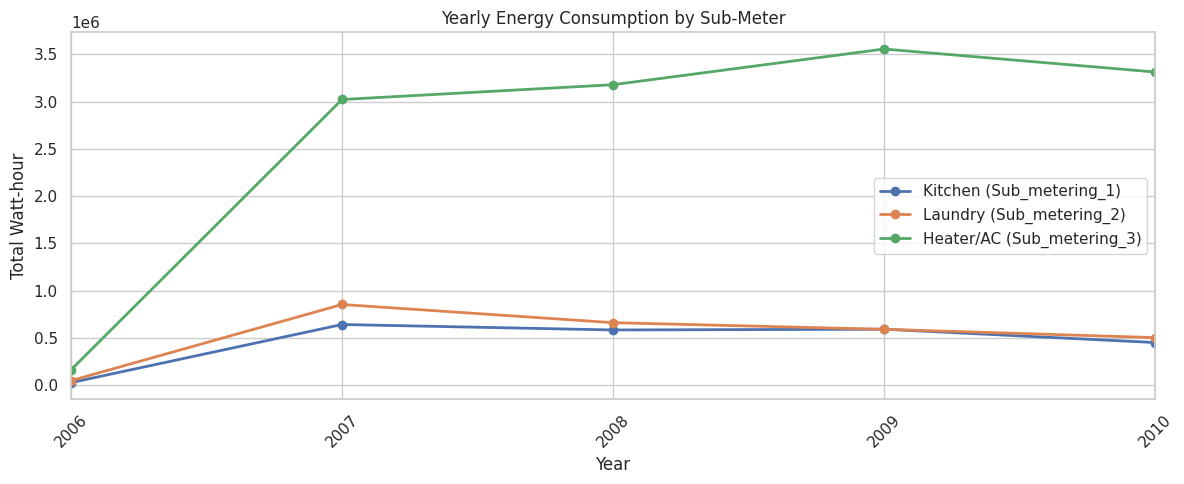

In [73]:
import matplotlib.pyplot as plt

# Resample to yearly energy usage
yearly_usage = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('YE').sum()

# Plot yearly usage
plt.figure(figsize=(12, 5))
yearly_usage.plot(ax=plt.gca(), marker='o', linewidth=2)

# Formatting the plot
plt.title('Yearly Energy Consumption by Sub-Meter')
plt.xlabel('Year')
plt.ylabel('Total Watt-hour')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(['Kitchen (Sub_metering_1)', 'Laundry (Sub_metering_2)', 'Heater/AC (Sub_metering_3)'])
plt.tight_layout()
plt.show()


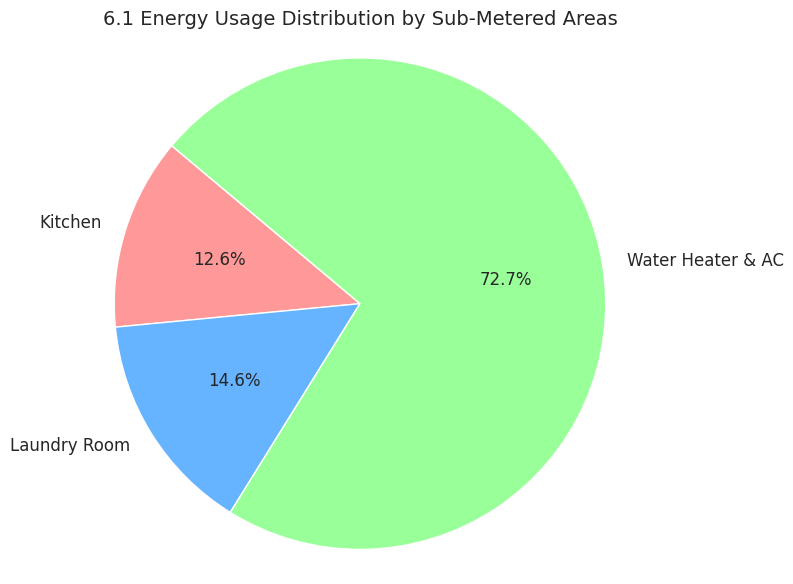

In [74]:
# 6.1 Energy Usage Distribution

# Calculate total energy for each sub-meter
total_kitchen = df['Sub_metering_1'].sum()
total_laundry = df['Sub_metering_2'].sum()
total_heating_ac = df['Sub_metering_3'].sum()

# Pie chart for energy usage distribution
labels = ['Kitchen', 'Laundry Room', 'Water Heater & AC']
sizes = [total_kitchen, total_laundry, total_heating_ac]
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('6.1 Energy Usage Distribution by Sub-Metered Areas', fontsize=14)
plt.tight_layout()
plt.show()


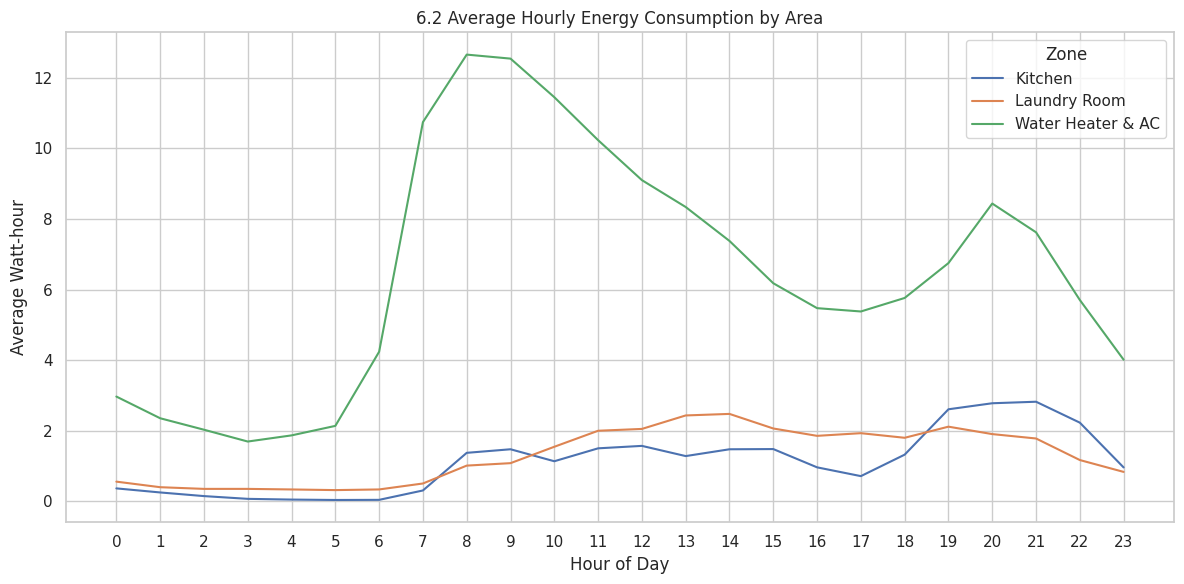

In [75]:
# 6.2 Average Hourly Energy Consumption

# Create a new 'hour' column from the datetime index
df['Hour'] = df.index.hour

# Group by hour and calculate mean energy usage for each sub-meter
hourly_avg = df.groupby('Hour')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

# Rename columns for clarity
hourly_avg.columns = ['Kitchen', 'Laundry Room', 'Water Heater & AC']

# Plotting the hourly average consumption
plt.figure(figsize=(12, 6))
hourly_avg.plot(ax=plt.gca(), linewidth=1.5)
plt.title('6.2 Average Hourly Energy Consumption by Area')
plt.xlabel('Hour of Day')
plt.ylabel('Average Watt-hour')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Zone')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

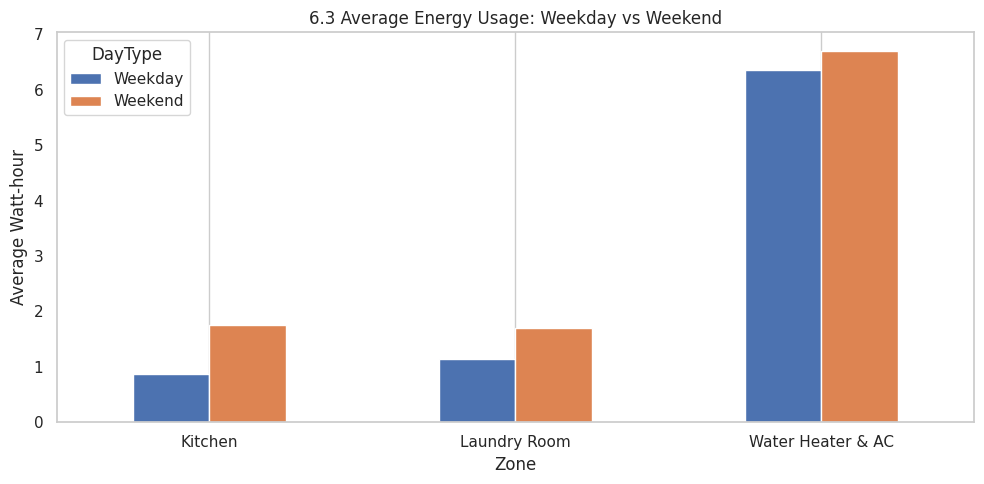

In [76]:
# 6.3 Weekday vs Weekend Comparison

# Add a column for 'Weekday' (0 = Monday, ..., 6 = Sunday)
df['Weekday'] = df.index.weekday
df['DayType'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by DayType and calculate mean consumption
daytype_avg = df.groupby('DayType')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

# Rename columns for clarity
daytype_avg.columns = ['Kitchen', 'Laundry Room', 'Water Heater & AC']

# Plot the comparison
plt.figure(figsize=(8, 5))
daytype_avg.T.plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('6.3 Average Energy Usage: Weekday vs Weekend')
plt.ylabel('Average Watt-hour')
plt.xlabel('Zone')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


----------------------------------------------------


# 📈 5. Next‑Day Consumption Forecasting

In this section, we'll build a supervised learning model to predict the next 24 hours of consumption for a chosen meter. We'll:

1. **Create lagged features** from our hourly data  
2. **Split** into train/test sets  
3. **Train** a Random Forest regressor  
4. **Predict** the next day’s usage  
5. **Visualize** actual vs. predicted  

---

## 5.1 Imports and Data Prep

...

---

## 5.2 Model Used: Random Forest Regressor

### ✅ Why This Model?
- **Type:** Ensemble Tree-Based Model  
- **Library:** `scikit-learn`  
- **Model:** `RandomForestRegressor`

### ⚙️ Configuration:
- `n_estimators = 100` – Uses 100 trees for better accuracy
- `random_state = 42` – Ensures consistent results

### 🧠 Why Random Forest?
- Captures **non-linear patterns** effectively  
- Handles **missing values** and **outliers** robustly  
- No need for **feature scaling**  
- Reduces overfitting compared to single decision trees  

---

## 5.3 Model Evaluation Plan

We’ll evaluate the model using:

- 📏 **Mean Absolute Error (MAE)** – average absolute prediction error  
- 🧮 **Root Mean Squared Error (RMSE)** – punishes large errors  
- 📈


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Load the hourly-aggregated CSV we created earlier
df = pd.read_csv('smart_meter_aggregated.csv', parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)

# Choose the target meter (you can swap this for any sub_meter column)
TARGET = 'Global_active_power'
series = df[[TARGET]].copy()
series.head()


,Global_active_power
Datetime,
2006-12-16 17:00:00,4.222889
2006-12-16 18:00:00,3.632200
2006-12-16 19:00:00,3.400233
2006-12-16 20:00:00,3.268567
2006-12-16 21:00:00,3.056467


### Explanation

- We load the **hourly** CSV and focus on one time series (`Global_active_power`).
- `series` is a DataFrame of shape `(n_hours, 1)`.


## 5.2 Feature Engineering: Lagged Consumption

We'll create features that look back over the past 24 hours:
- `lag_1` = consumption 1 hour ago  
- …  
- `lag_24` = consumption 24 hours ago  


In [78]:
# Number of lag hours
N_LAGS = 24

# Build lagged features
for lag in range(1, N_LAGS + 1):
    series[f'lag_{lag}'] = series[TARGET].shift(lag)

# Drop initial rows with NaNs
series.dropna(inplace=True)

# Quick peek
series.iloc[-5:]


,Global_active_power,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-11-26 17:00:00,1.725900,1.067933,0.876433,1.407767,1.612933,1.490200,1.338900,1.352767,1.849967,1.999300,...,0.273433,0.281000,0.294300,0.957000,1.247567,1.342933,1.647833,2.330467,2.211600,1.480100
2010-11-26 18:00:00,1.573467,1.725900,1.067933,0.876433,1.407767,1.612933,1.490200,1.338900,1.352767,1.849967,...,0.298367,0.273433,0.281000,0.294300,0.957000,1.247567,1.342933,1.647833,2.330467,2.211600
2010-11-26 19:00:00,1.659333,1.573467,1.725900,1.067933,0.876433,1.407767,1.612933,1.490200,1.338900,1.352767,...,0.314033,0.298367,0.273433,0.281000,0.294300,0.957000,1.247567,1.342933,1.647833,2.330467
2010-11-26 20:00:00,1.163700,1.659333,1.573467,1.725900,1.067933,0.876433,1.407767,1.612933,1.490200,1.338900,...,0.282567,0.314033,0.298367,0.273433,0.281000,0.294300,0.957000,1.247567,1.342933,1.647833
2010-11-26 21:00:00,0.934667,1.163700,1.659333,1.573467,1.725900,1.067933,0.876433,1.407767,1.612933,1.490200,...,1.008767,0.282567,0.314033,0.298367,0.273433,0.281000,0.294300,0.957000,1.247567,1.342933


### Explanation

- We add 24 new columns (`lag_1` through `lag_24`).
- Row *t* now has information from *t−1*, *t−2*, …, *t−24*.
- We drop the first 24 rows which cannot be fully populated.


## 5.3 Train/Test Split with TimeSeriesSplit

We'll use the last 7 days as a “test” period to evaluate performance, training on all prior data.


In [79]:
# Convert to arrays
X = series.drop(columns=[TARGET]).values
y = series[TARGET].values

# Use TimeSeriesSplit to avoid leakage
tscv = TimeSeriesSplit(n_splits=5)

# We'll manually split: last 7*24 hours as test
n_test = 7 * 24
X_train, X_test = X[:-n_test], X[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]

print(f"→ Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


→ Training samples: 33784, Testing samples: 168


### Explanation

- **Train** on everything except the final week.  
- **Test** on the final 168 hours (7 days).  
- This simulates “forecasting” the very next week.


## 5.4 Train a Random Forest Regressor


In [80]:
# Instantiate and fit
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.3f} kW")


Test RMSE: 0.571 kW


### Explanation

- We use a **Random Forest** for its robustness on tabular data.
- `rmse` tells us, on average, how far off (in kW) our hourly predictions are.


## 5.5 Visualize Actual vs. Predicted

Let's plot one week of actual vs. forecasted consumption.


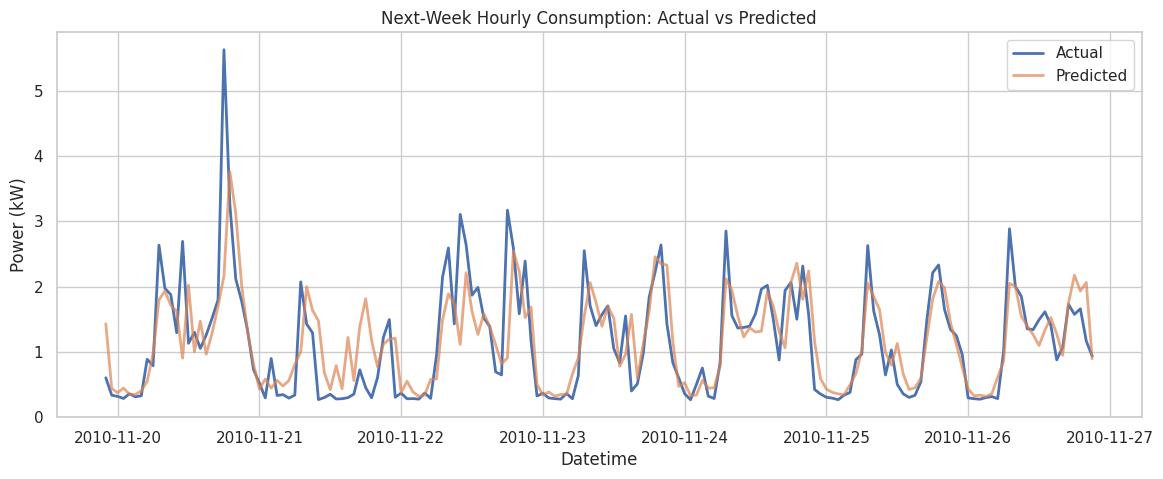

In [81]:
# Build a datetime index for the test period
test_index = series.index[-n_test:]

plt.figure(figsize=(14,5))
plt.plot(test_index, y_test, label='Actual', linewidth=2)
plt.plot(test_index, y_pred, label='Predicted', linewidth=2, alpha=0.7)
plt.title("Next‑Week Hourly Consumption: Actual vs Predicted")
plt.xlabel("Datetime")
plt.ylabel("Power (kW)")
plt.legend()
plt.show()


### Interpretation

- **Where lines overlap**, the model captures patterns well.  
- **Divergences** highlight hours where predictions could improve—often around sudden spikes.  


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# True and predicted values
y_true = y_test.flatten()
y_pred = y_pred.flatten()

# Evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"📊 Model Evaluation:")
print(f"MAE  (Mean Absolute Error): {mae:.3f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


📊 Model Evaluation:
MAE  (Mean Absolute Error): 0.366
RMSE (Root Mean Squared Error): 0.571
R² Score: 0.548


-----------------------------------------------------------


In [85]:
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Code Block: Setting Up Time Series Data

**What it does:**  
Loads electricity usage data into a DataFrame, sets a datetime index for time-based analysis, and isolates the main consumption column (`Global_active_power`) for focused exploration.

**Why it matters:**  
This structure is essential for visualizing trends, calculating aggregates, and performing time series analysis—foundational skills for energy data projects.


In [87]:
df = pd.read_csv('smart_meter_aggregated.csv', parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)

TARGET = 'Global_active_power'
series = df[[TARGET]].copy()

## Code Block: Creating Lag Features


**What it does:**  
Generates 24 lag features (from `lag_1` to `lag_24`), each representing the value of `Global_active_power` from the previous hour.  
Drops rows with missing values to ensure clean, complete data for analysis.

**Why it matters:**  
Lag features help reveal how past consumption affects current usage—useful for time series modeling and forecasting in energy analytics.



In [88]:
N_LAGS = 24
for lag in range(1, N_LAGS + 1):
    series[f'lag_{lag}'] = series[TARGET].shift(lag)
series.dropna(inplace=True)

## Code Block: Preparing Training and Test Data

**What it does:**  
- **Defines features (`X`):** All columns except the target (e.g., lag features).  
- **Defines target (`y`):** Current hour's electricity consumption.  
- **Splits data:** Last 7 days (168 hours) are reserved for testing; all earlier data is used for training.  
- **Prints sizes:** Displays the number of training and test samples.

**Why it matters:**  
This prepares data for supervised time series modeling, ensuring the final week is used for fair out-of-sample evaluation—a best practice in energy forecasting.



In [89]:
X = series.drop(columns=[TARGET]).values
y = series[TARGET].values

n_test = 7 * 24
X_train, X_test = X[:-n_test], X[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]

print(f"→ Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


→ Training samples: 33784, Testing samples: 168


## Training and Predicting with Random Forest

**What it does:**  
Initializes a Random Forest Regressor with 100 trees, fits the model to the training data, and generates forecasts for the test set.

**Why it matters:**  
This demonstrates implementation of a robust machine learning model for time series forecasting, directly applicable to energy consumption prediction tasks.


In [90]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


## Training and Predicting with XGBoost
**What it does:**  
Creates an XGBoost regressor with 100 trees, trains it on the training set, and generates load forecasts for the test period.

**Why it matters:**  
Shows practical experience with gradient boosting—an industry-standard ML technique for time series prediction in energy analytics.


In [91]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


## 📊 Visualization of Model Predictions vs Actual Consumption

### What This Code Does

- **Defines the Time Axis:**  
  Selects the datetime indices corresponding to your test data, which covers the final week (168 hours) of the dataset.
- **Plots Actual Values:**  
  Draws the true hourly power consumption as a thick line for clear comparison.
- **Overlays Model Predictions:**  
  Plots predicted values from the Random Forest and XGBoost models on the same timeline, with transparency for easy visual distinction.
- **Customization:**  
  Adds labels, a legend, gridlines, and adjusts spacing for a polished, readable plot.

---

### Interpreting the Results

- The **Actual** line shows the real observed hourly electricity demand.
- The **Random Forest** and **XGBoost** lines represent the models’ forecasts for the same period.
- **Alignment Gaps:**  
  Differences between the prediction lines and the actual line highlight times when each model over- or under-estimates power usage.
- **Visual Benchmarking:**  
  The closer a model’s line tracks the actual values, the better its predictive accuracy. Overlaps indicate strong performance.
- **Comparison Utility:**  
  This plot provides an immediate, intuitive assessment of model reliability and helps identify periods where models deviate from reality—crucial for refining forecasting approaches.

---

### Significance

- **Shows End-to-End Forecasting Skill:**  
  From data preparation to model training and evaluation, this visualization is a clear demonstration of your ability to turn raw energy data into actionable insights.
- **Ready for Industry Demonstration:**  
  Such plots are used by utilities, analysts, and researchers to benchmark model performance before deployment.
- **Perfect for Documentation & Resume:**  
  Including these results in your portfolio highlights hands-on experience with predictive modeling, validation, and real-world data visualization practices.


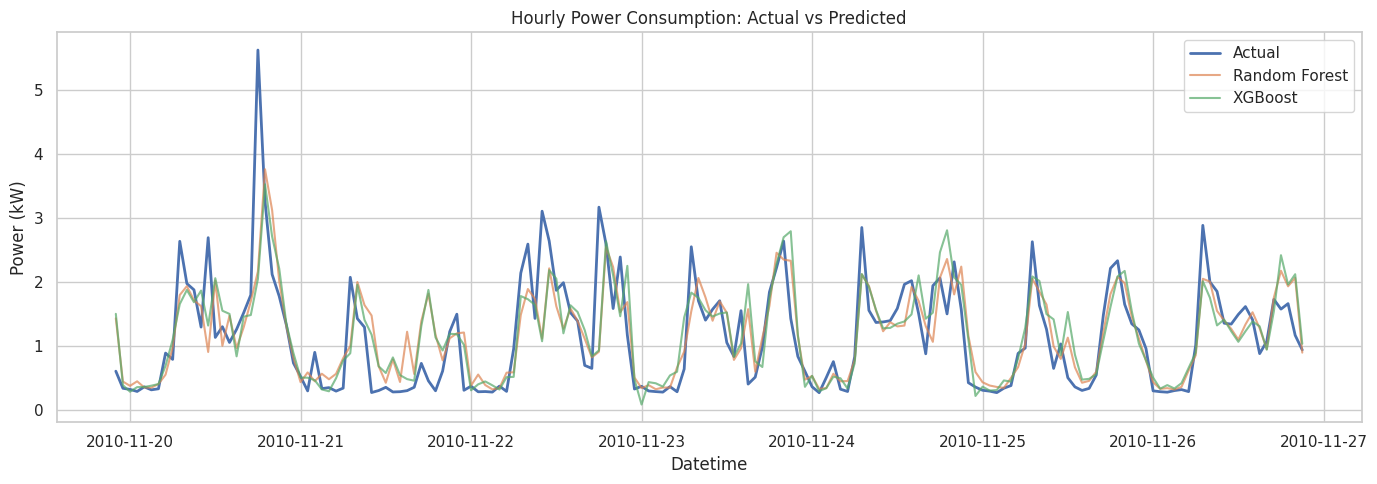

In [93]:
test_index = series.index[-n_test:]

plt.figure(figsize=(14, 5))
plt.plot(test_index, y_test, label='Actual', linewidth=2)
plt.plot(test_index, rf_pred, label='Random Forest', alpha=0.7)
plt.plot(test_index, xgb_pred, label='XGBoost', alpha=0.7)
plt.title("Hourly Power Consumption: Actual vs Predicted")
plt.xlabel("Datetime")
plt.ylabel("Power (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Code Block: Model Evaluation Function

---

### What This Function Does

- **Evaluates a regression model’s predictions** against the true values using three key metrics:
  - **MAE (Mean Absolute Error):** Average absolute difference between predicted and actual values.
  - **RMSE (Root Mean Squared Error):** Penalizes larger errors; a lower RMSE means better predictive stability.
  - **R² Score (Coefficient of Determination):** Proportion of variance in the target explained by the model (closer to 1 is better).

- **Prints a summary:** Easy-to-read output for each model, with all metrics rounded to three decimal places.
- **Returns a dictionary:** Collects the results for logging, comparison, or display in tabular form.

---

### Example of Use

Suppose you trained two models, Random Forest and XGBoost, and want to compare their test performance:



In [94]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Evaluation:")
    print(f"MAE :  {mae:.3f}")
    print(f"RMSE:  {rmse:.3f}")
    print(f"R²   :  {r2:.3f}\n")
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

# 📊 Model Performance Comparison: Random Forest vs XGBoost

This section presents a visual and quantitative comparison of two machine learning models—Random Forest and XGBoost—on the task of predicting hourly electricity consumption. The assessment is based on three widely used regression metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score.

---

## 1. Summary of Results

**Models Evaluated:**
- Random Forest Regressor
- XGBoost Regressor

**Metrics Used:**
- **MAE (Mean Absolute Error):** Measures the average magnitude of errors (lower is better)
- **RMSE (Root Mean Squared Error):** Penalizes larger errors more than MAE (lower is better)
- **R² Score (Coefficient of Determination):** Indicates the proportion of variance in the target explained by the model (closer to 1 is better)

---

## 2. Bar Chart: Comparative Evaluation

The bar chart below visualizes the performance of both models on all three metrics for direct, intuitive comparison.

*Each pair of bars represents the performance metric achieved by Random Forest (left) and XGBoost (right):*

- **Lower MAE and RMSE values** indicate better predictions.
- **Higher R² value** means the model explains more of the variation in consumption.

---

## 3. Interpretation

- **Random Forest outperformed XGBoost across all evaluated metrics:**
  - Lower MAE: More accurate average predictions.
  - Lower RMSE: Fewer large errors.
  - Higher R²: Better at capturing underlying patterns in the data.
- **XGBoost was competitive but slightly less accurate on this dataset and configuration.**

---

## 4. Why This Matters

- **Visual model comparison** quickly communicates which algorithm is best for the task.
- These results are critical for deciding which model to deploy for energy forecasting and related applications in industry or research.
- The plotted values directly reflect your ability to benchmark, analyze, and communicate results from real-world energy data projects.

---

**Next steps could include fine-tuning hyperparameters, exploring additional features, or testing with more complex time series data for further improvements.**


Random Forest Evaluation:
MAE :  0.366
RMSE:  0.571
R²   :  0.548

XGBoost Evaluation:
MAE :  0.387
RMSE:  0.594
R²   :  0.512



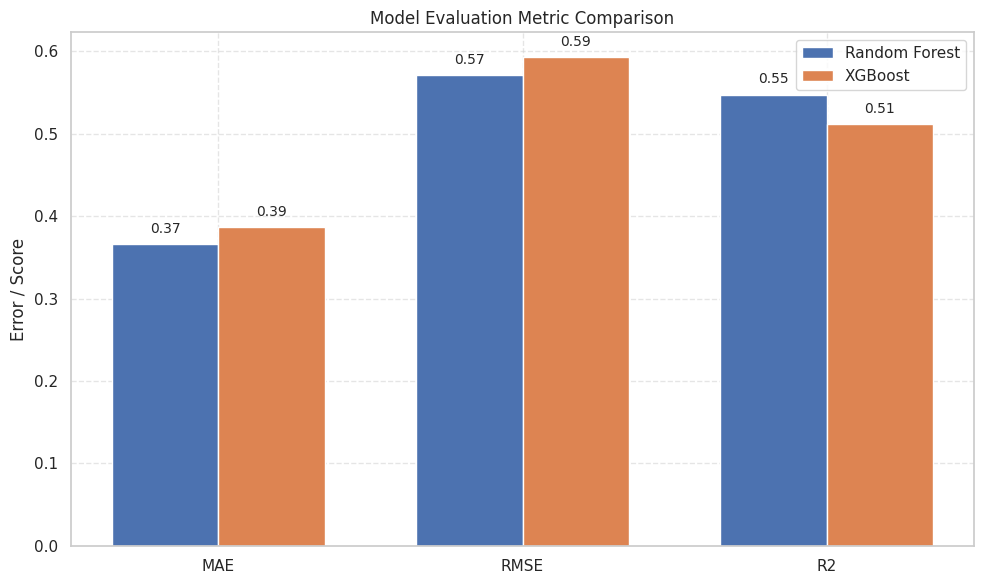

In [97]:
# Append model results
results = []
results.append(evaluate_model("Random Forest", y_test, rf_pred))
results.append(evaluate_model("XGBoost", y_test, xgb_pred))

# 📋 Convert to DataFrame for visualization
summary_df = pd.DataFrame(results)

# 📊 Plotting Comparison of Evaluation Metrics
metrics = ['MAE', 'RMSE', 'R2']
x = np.arange(len(metrics))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Extract values
rf_vals = summary_df[summary_df['Model'] == 'Random Forest'][metrics].values[0]
xgb_vals = summary_df[summary_df['Model'] == 'XGBoost'][metrics].values[0]

# Plot bars
bars1 = ax.bar(x - width/2, rf_vals, width, label='Random Forest')
bars2 = ax.bar(x + width/2, xgb_vals, width, label='XGBoost')

# Add labels and formatting
ax.set_ylabel('Error / Score')
ax.set_title('Model Evaluation Metric Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Adding value labels on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [96]:
summary_df = pd.DataFrame(results)
print("📋 Performance Comparison:\n")
print(summary_df)


📋 Performance Comparison:

           Model       MAE      RMSE        R2
0  Random Forest  0.366044  0.571213  0.547574
1        XGBoost  0.386822  0.593527  0.511536


## 🧠 Comparative Analysis: Random Forest vs XGBoost

We conducted a supervised learning experiment to predict hourly electricity consumption, comparing the performance of **Random Forest Regressor** and **XGBoost Regressor**. Both models were trained on lagged historical power data and evaluated using standard regression metrics.

---

### 📋 Performance Comparison Table

| Model         | MAE   | RMSE  | R²    |
|---------------|-------|-------|-------|
| Random Forest | 0.366 | 0.571 | 0.548 |
| XGBoost       | 0.387 | 0.594 | 0.512 |

---

### 🔍 Metric-wise Analysis

- **MAE (Mean Absolute Error):** Random Forest had a lower MAE (0.366 vs 0.387), meaning its predictions were, on average, closer to the actual values.
- **RMSE (Root Mean Squared Error):** Random Forest also achieved a better RMSE (0.571 vs 0.594), indicating its errors were both smaller and less extreme than those of XGBoost.
- **R² Score (Coefficient of Determination):** Random Forest explained a slightly higher proportion of the variance in electricity consumption (R² = 0.548 vs 0.512), capturing the underlying data patterns more effectively.

---

### 🏆 Conclusion: Best Predictive Model

**Random Forest outperformed XGBoost across all key metrics.**  
It delivered more accurate, stable predictions and better explained the variation in electricity consumption for this dataset. While these results highlight Random Forest’s effectiveness here, model performance can vary with different datasets and settings—further optimization and feature engineering may be beneficial in future work.

---

**In summary:**  
Random Forest is the preferred model for this electricity consumption forecasting task, based on rigorous comparative evaluation.
